# Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
keras.__version__

'2.6.0'

In [3]:
tf.__version__

'2.6.0'

# Importing dataset from Keras

In [4]:
fashion_mnist= keras.datasets.fashion_mnist

In [5]:
(xtrain_full,ytrain_full),(xtest,ytest)=fashion_mnist.load_data()

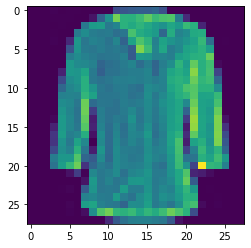

In [6]:
plt.imshow(xtest[4])

In [7]:
ytrain_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_name=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_name[ytrain_full[4]]

'T-shirt/top'

In [10]:
xtrain_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

# Data Normalizatiom

Our x variable is present in the form of 2d array of 28*28p intesities.
where each individual pixel intesity lies betwen 0 to 255.

since we are going to use GD to compile our model we need to normalize pixel 
intensities.
Normalizing means we are restricting the pixel intencity to 0 to 1 by 
deviding by 255.
where 0 means black & 1 means white.

In [11]:
xtrain_n=xtrain_full/255.
xtest_n=xtest/255.

In [12]:
print(xtrain_full.shape)
print(ytrain_full.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Split the dataset in train, validate, and testing.
we have 60000 observations in training, test dataset is of 
another 10000 observations.

We will use the first 5000 observations as our validation test.
And next, 55000 as training dataset.
So to do that, we can just do using this simple operation
We are saving over zero to 5000 datasets to X validation.
And from 5000 to 60000 for training.

And our X test will remain the same.

In [13]:
xvalid,xtrain=xtrain_n[:5000],xtrain_n[5000:]
yvalid,ytrain=ytrain_full[:5000],ytrain_full[5000:]

In [14]:
xtest=xtest_n

# Building Neural Network

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 419,110
Trainable params: 419,110
Non-trainable params: 0
_________________________________________________________________


In [17]:
weight,bais=model.layers[1].get_weights()

In [18]:
weight.shape

(784, 300)

In [19]:
bais.shape

(300,)

# Compile the Model

y data is in the form of lable(10 differnt lable for specific itom)
--> loss="sparse_categorical_crossentropy".

if we have probability in class in y variable then 
--> loss="categorical_crossentropy"

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [21]:
model_history=model.fit(xtrain,ytrain,epochs=30,validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7404 - accuracy: 0.7539 - val_loss: 0.7368 - val_accuracy: 0.7486
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4803 - accuracy: 0.8310 - val_loss: 0.4437 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4305 - accuracy: 0.8485 - val_loss: 0.4108 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4006 - accuracy: 0.8571 - val_loss: 0.3887 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3783 - accuracy: 0.8651 - val_loss: 0.3649 - val_accuracy: 0.8722
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3613 - accuracy: 0.8718 - val_loss: 0.3676 - val_accuracy: 0.8656
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3463 - accuracy: 0.8756 - val_loss: 0.3615 - val_accur

In [22]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
model_history.history

{'loss': [0.7404405474662781,
  0.4803302586078644,
  0.43054574728012085,
  0.40061450004577637,
  0.3783419132232666,
  0.36126381158828735,
  0.3463449478149414,
  0.33528169989585876,
  0.3230731189250946,
  0.31271713972091675,
  0.3044111430644989,
  0.29571542143821716,
  0.28864139318466187,
  0.2805473804473877,
  0.27353522181510925,
  0.26628854870796204,
  0.2610953450202942,
  0.2557986080646515,
  0.24912841618061066,
  0.24439847469329834,
  0.24060408771038055,
  0.23288112878799438,
  0.22822649776935577,
  0.2238801270723343,
  0.21847684681415558,
  0.21359296143054962,
  0.20927390456199646,
  0.20582887530326843,
  0.2017669379711151,
  0.19741290807724],
 'accuracy': [0.7539272904396057,
  0.8309817910194397,
  0.8485272526741028,
  0.8571454286575317,
  0.8651090860366821,
  0.8717818260192871,
  0.8755999803543091,
  0.8787999749183655,
  0.882309079170227,
  0.8870545625686646,
  0.8900908827781677,
  0.8942000269889832,
  0.8953454494476318,
  0.89765453338623

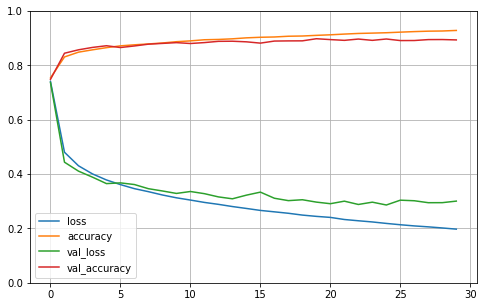

In [24]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluate

In [25]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8782


[0.34383729100227356, 0.8781999945640564]

In [26]:
xnew=xtest[:3]

In [27]:
xnew.shape

(3, 28, 28)

In [28]:
ypred1=model.predict(xnew)

In [29]:
ypred1.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
#ypred1_class=model.predict_classes(xtest)
ypred1=model.predict(xnew)
classes_x=np.argmax(ypred1,axis=1)

In [31]:
classes_x

array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_name)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

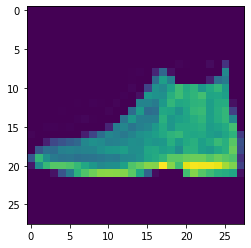

In [33]:
plt.imshow(xtest[0])

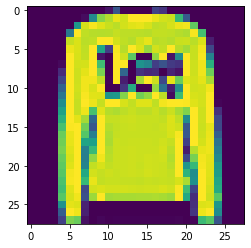

In [34]:
plt.imshow(xtest[1])

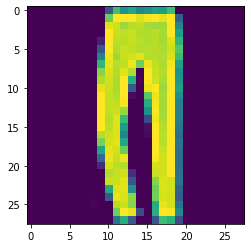

In [35]:
plt.imshow(xtest[2])

In [ ]:
#the change is from terminal
#change in new branch from terminal